In [1]:
# Importing necessary libraries
from typing import List

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.interpolate import make_interp_spline

In [2]:
def visualize_graph(graph, title, pos=None):
    """
    Visualizes a network graph using matplotlib.

    Args:
        graph (networkx.Graph): The graph object to be visualized.
        title (str): Title of the plot.
        pos (dict, optional): Dictionary of node positions. If None, default layout is used.
    """
    plt.figure(figsize=(6, 6))
    
    if pos is None:
        pos = nx.spring_layout(graph)  # Position nodes using Fruchterman-Reingold force-directed algorithm
        
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10)
    plt.title(title)
    plt.show()

def plot_log_binned_distribution(degree_sequence, ax, title, min_degree=1):
    """
    Plots a log-binned degree distribution of the network.

    Args:
        degree_sequence (list): List of node degrees.
        ax (matplotlib.axes.Axes): The axes to plot on.
        title (str): Title of the plot.
        min_degree (int, optional): The minimum degree threshold for inclusion. Default is 1.
    """
    filtered_degrees = [d for d in degree_sequence if d >= min_degree]
    
    # Log binning
    bins = np.logspace(np.log10(min(filtered_degrees)), np.log10(max(filtered_degrees)), num=20)
    hist, edges = np.histogram(filtered_degrees, bins=bins, density=True)
    bin_centers = 0.5 * (edges[1:] + edges[:-1])
    
    non_zero_mask = hist > 0
    bin_centers = bin_centers[non_zero_mask]
    hist = hist[non_zero_mask]
    
    ax.plot(bin_centers, hist, 'o', markersize=8, color='r', label=f'comments >= {min_degree}')
    
    # Smoothing the plot with spline
    x_smooth = np.logspace(np.log10(min(bin_centers)), np.log10(max(bin_centers)), 200)
    spline = make_interp_spline(np.log10(bin_centers), np.log10(hist), k=3)
    y_smooth = spline(np.log10(x_smooth))
    
    # Plot the smoothed curve
    ax.plot(x_smooth, 10**y_smooth, linestyle='-', color='b', label=f'Spline')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, which="both", ls="--")
    ax.set_xlabel('Node Degree k')
    ax.set_ylabel('Number of Nodes')
    ax.legend()
    ax.set_title(title)

def create_initial_graph(node_count=6, probability=0.4):
    """
    Creates the initial Erdos-Renyi graph for t0.

    Args:
        node_count (int): Number of nodes in the graph.
        probability (float): Probability of edge creation between two nodes.

    Returns:
        networkx.Graph: The generated Erdos-Renyi graph.
    """
    return nx.erdos_renyi_graph(n=node_count, p=probability)

def generate_scale_free_graph(node_count=900, edge_count=5):
    """
    Generates a Barabasi-Albert scale-free graph.

    Args:
        node_count (int): Total number of nodes in the graph.
        edge_count (int): Number of edges to attach from a new node to existing nodes.

    Returns:
        networkx.Graph: The generated Barabasi-Albert graph.
    """
    return nx.barabasi_albert_graph(n=node_count, m=edge_count)

def generate_random_graph(node_count=900, probability=0.15):
    """
    Generates a random Erdos-Renyi graph.

    Args:
        node_count (int): Total number of nodes in the graph.
        probability (float): Probability of edge creation between two nodes.

    Returns:
        networkx.Graph: The generated random Erdos-Renyi graph.
    """
    return nx.erdos_renyi_graph(n=node_count, p=probability)

def generate_dense_graph(node_count=900, edge_count=50000):
    """
    Generates a dense graph.

    Args:
        node_count (int): Total number of nodes in the graph.
        edge_count (int): Total number of edges in the graph.

    Returns:
        networkx.Graph: The generated dense graph.
    """
    return nx.dense_gnm_random_graph(n=node_count, m=edge_count)

def visualize_network_evolution(graph_type, steps, title_prefix, node_count=900):
    """
    Visualizes the evolution of a network over specified steps.

    Args:
        graph_type (str): Type of graph to visualize ('ba', 'random', 'dense').
        steps (list): List of time steps (t values) at which to visualize the network.
        title_prefix (str): Prefix for plot titles.
        node_count (int, optional): Total number of nodes in the graph. Default is 900.
    """
    if graph_type == 'ba':
        graph = generate_scale_free_graph(node_count)
    elif graph_type == 'random':
        graph = generate_random_graph(node_count)
    elif graph_type == 'dense':
        graph = generate_dense_graph(node_count)
    else:
        raise ValueError(f"Unknown graph type: {graph_type}")

    for t in steps:
        subgraph = graph.subgraph(range(t + 1))
        visualize_graph(subgraph, f"{title_prefix} at step t = {t}")

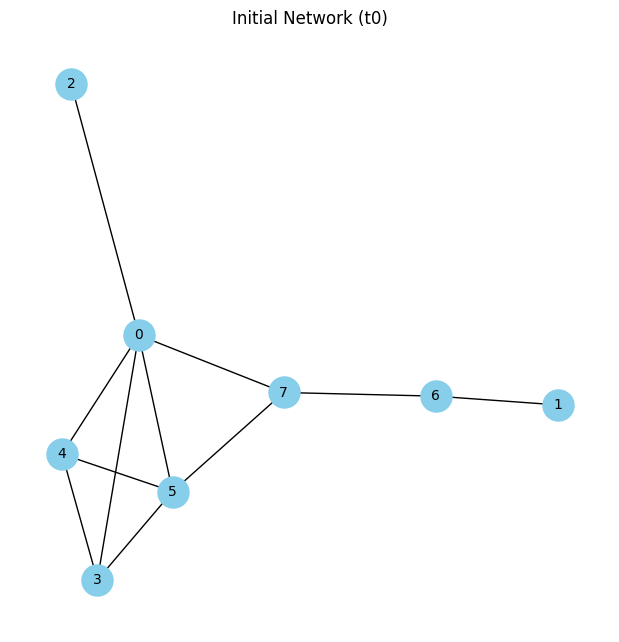

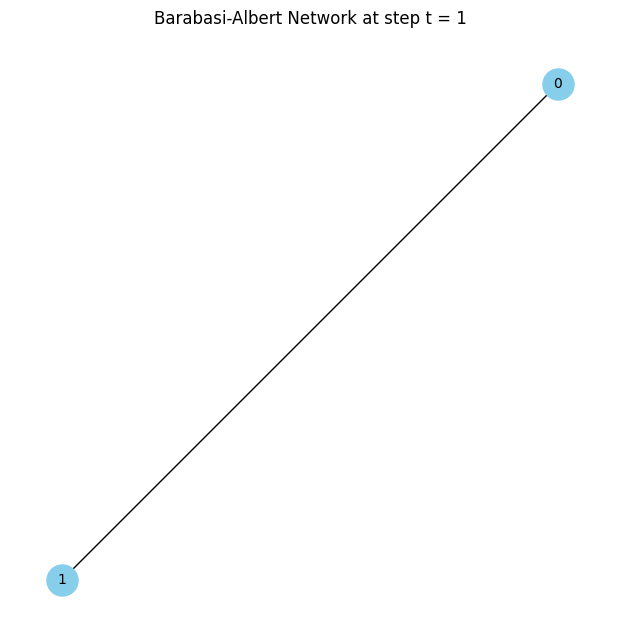

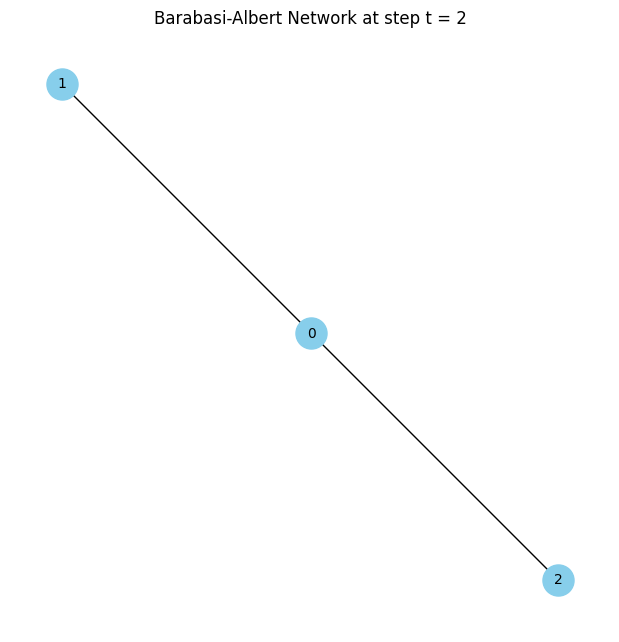

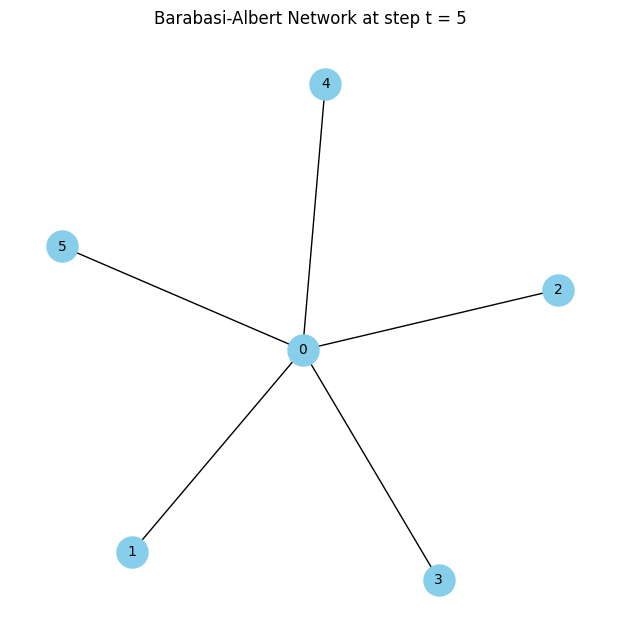

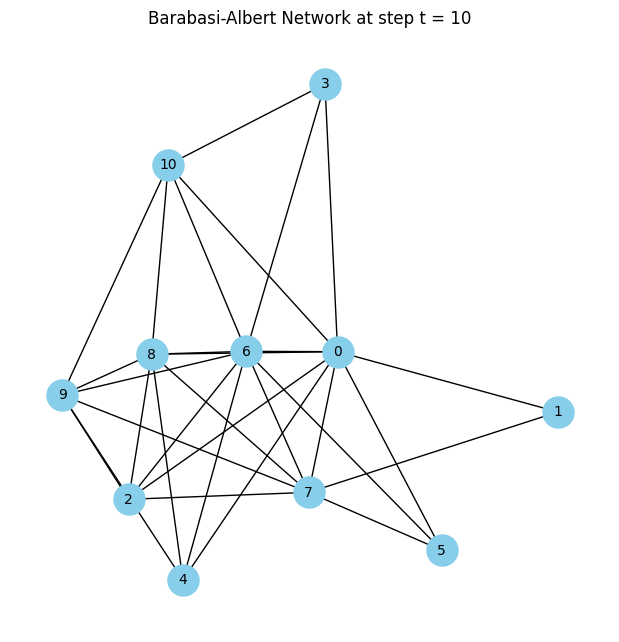

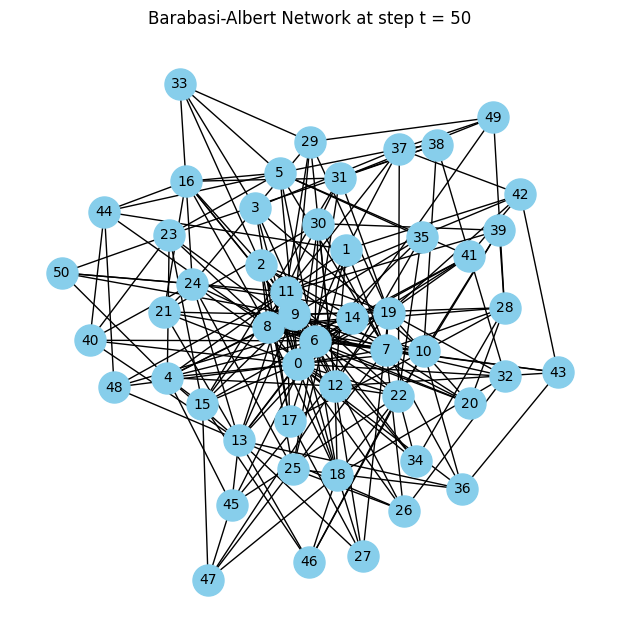

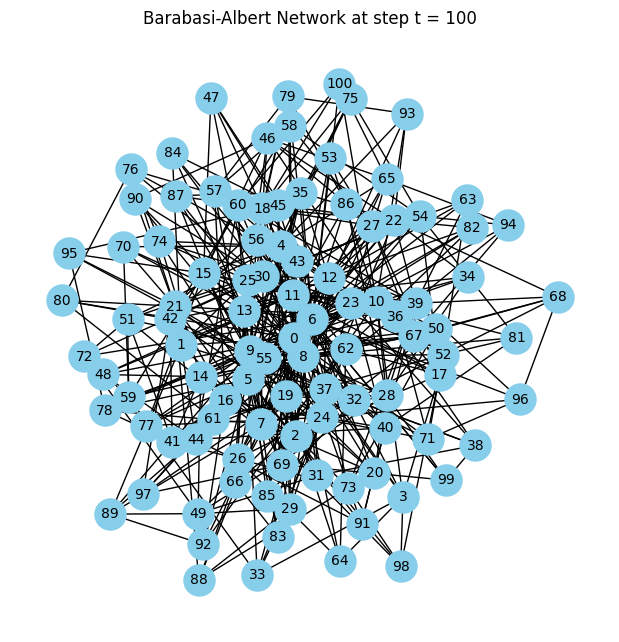

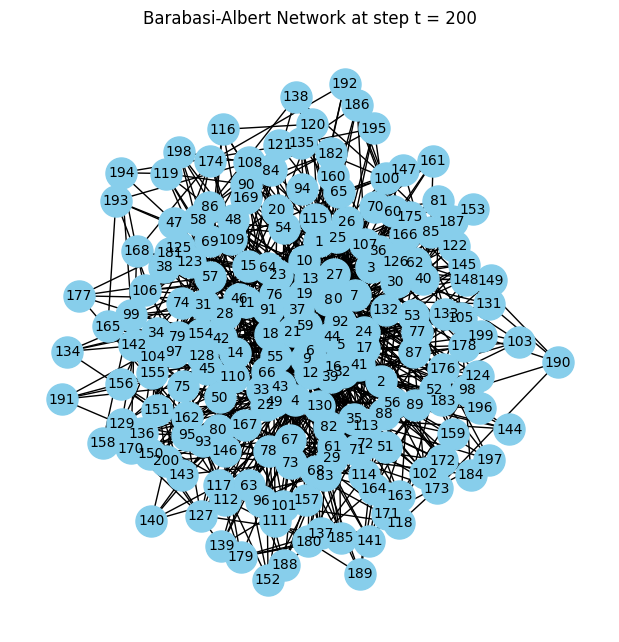

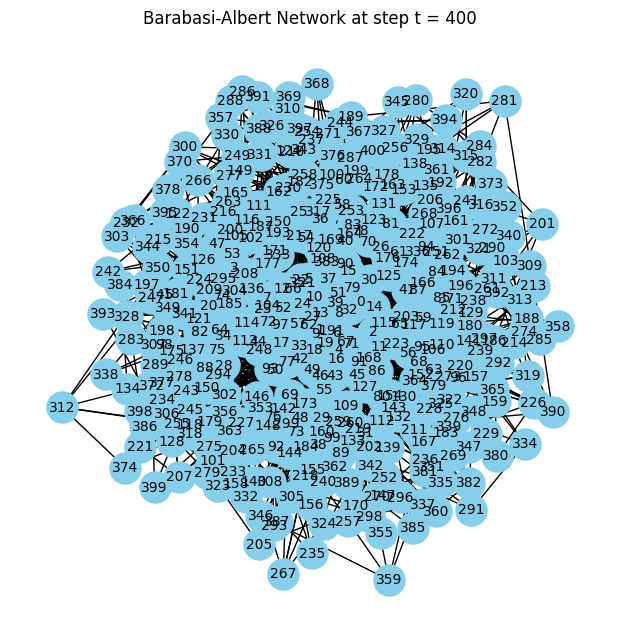

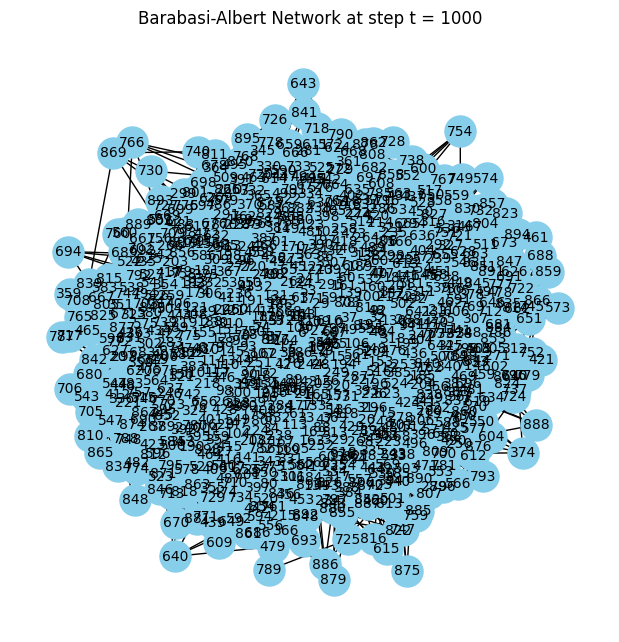

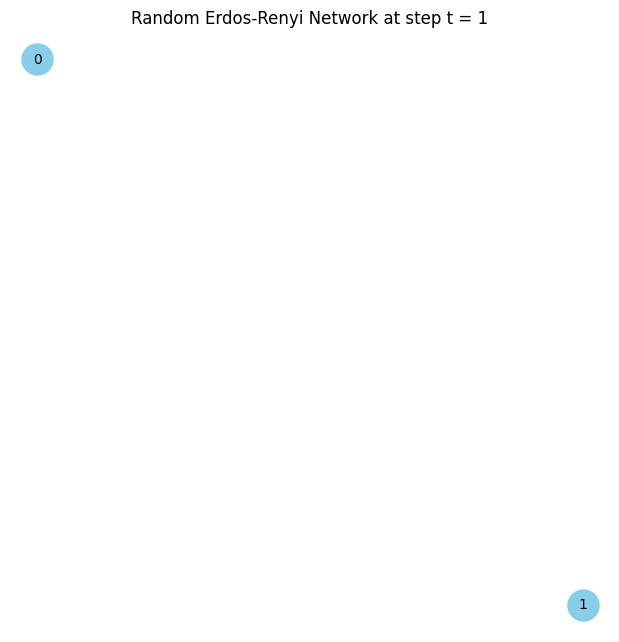

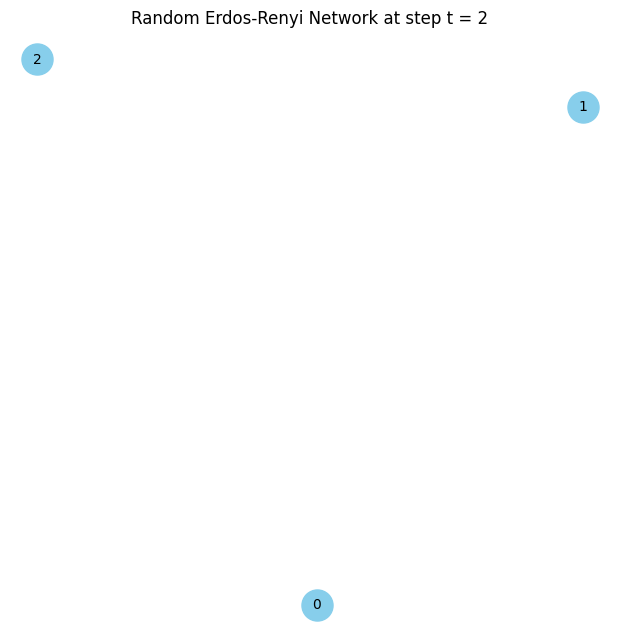

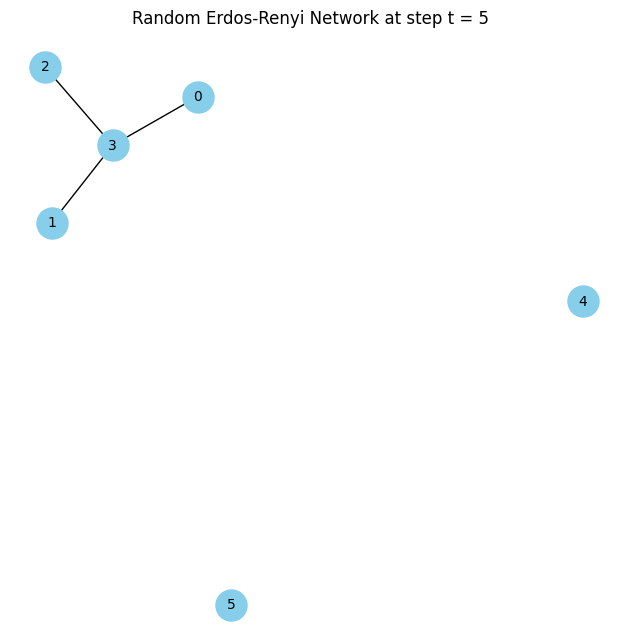

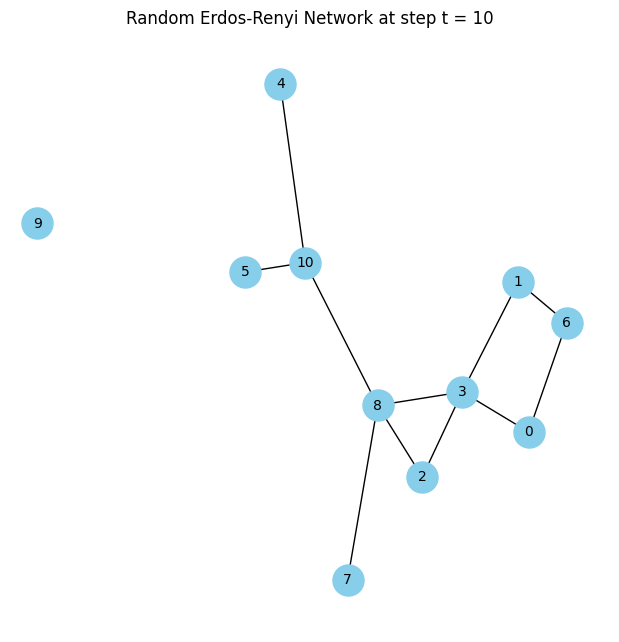

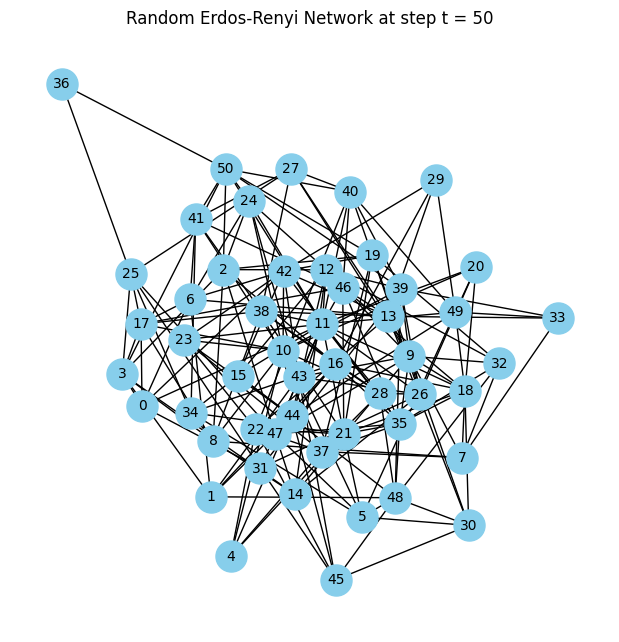

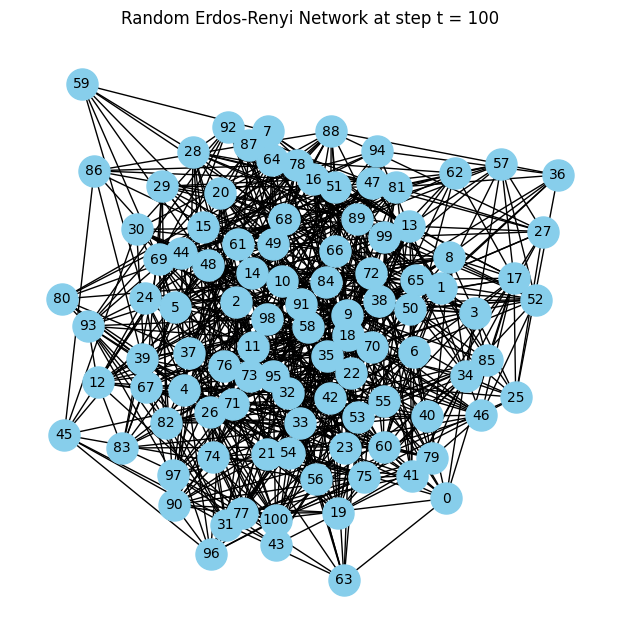

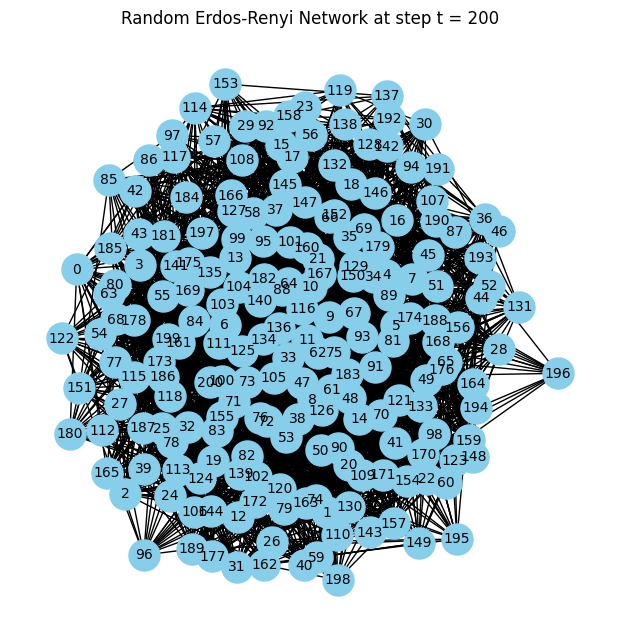

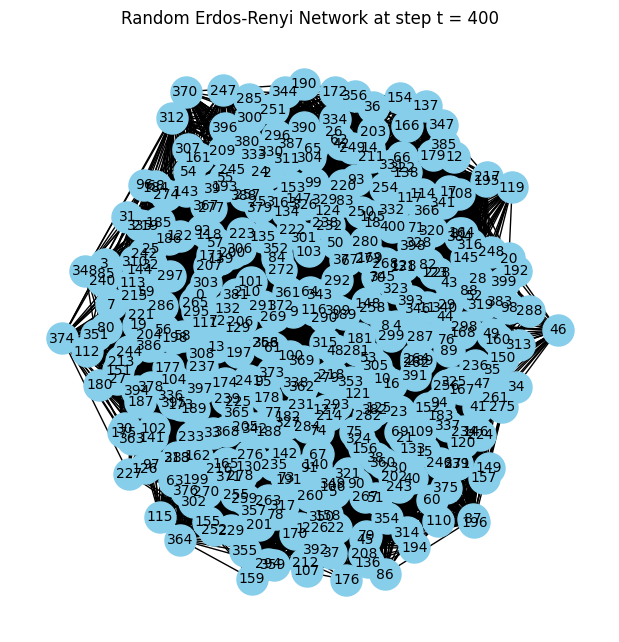

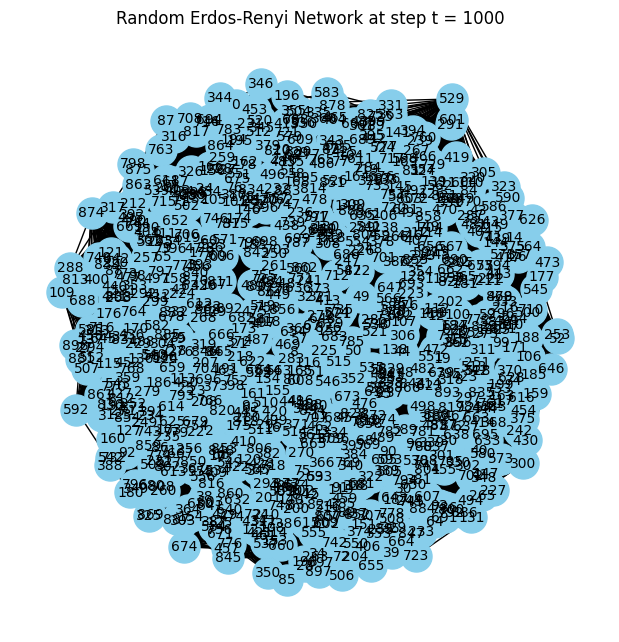

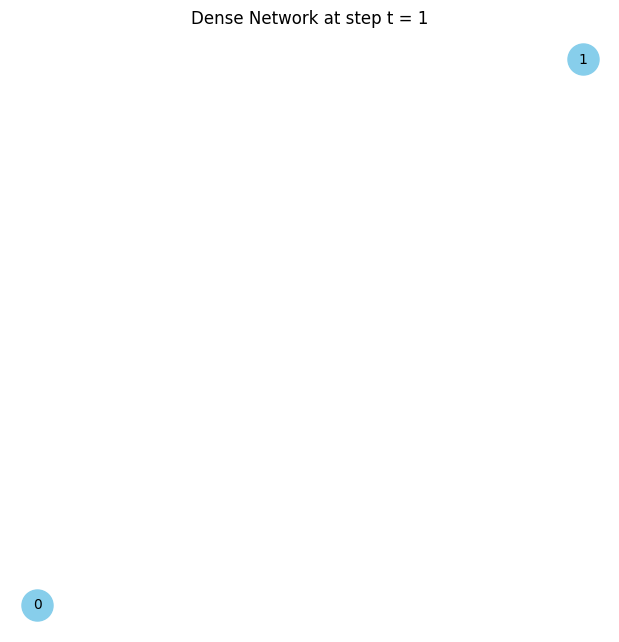

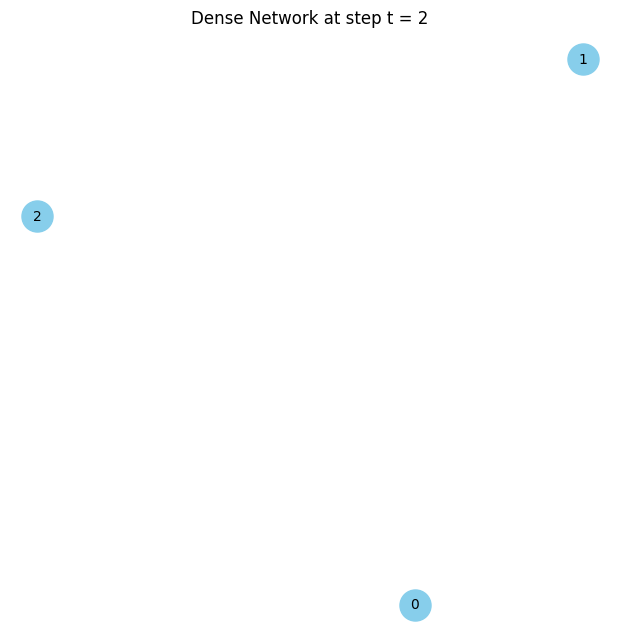

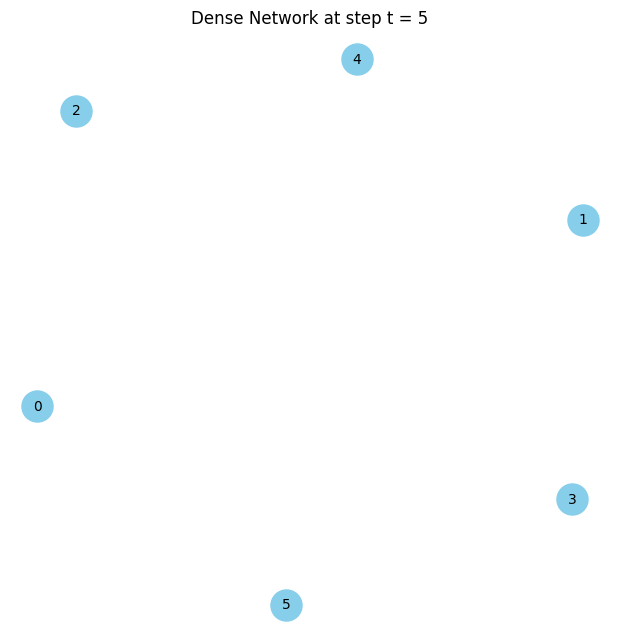

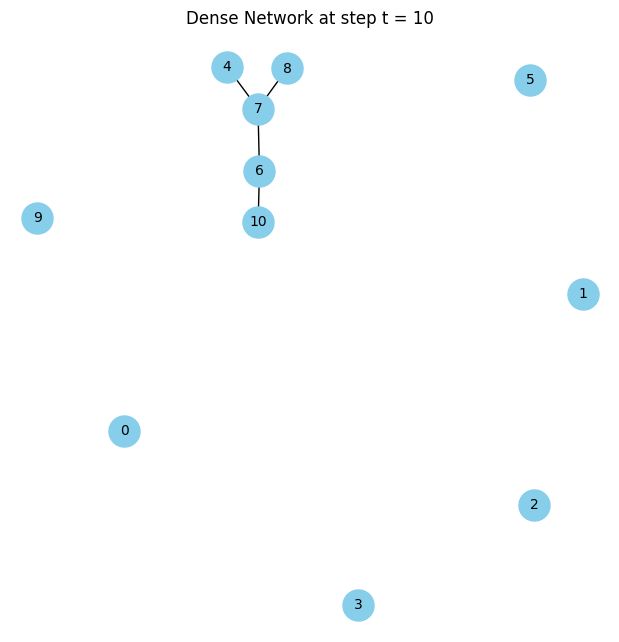

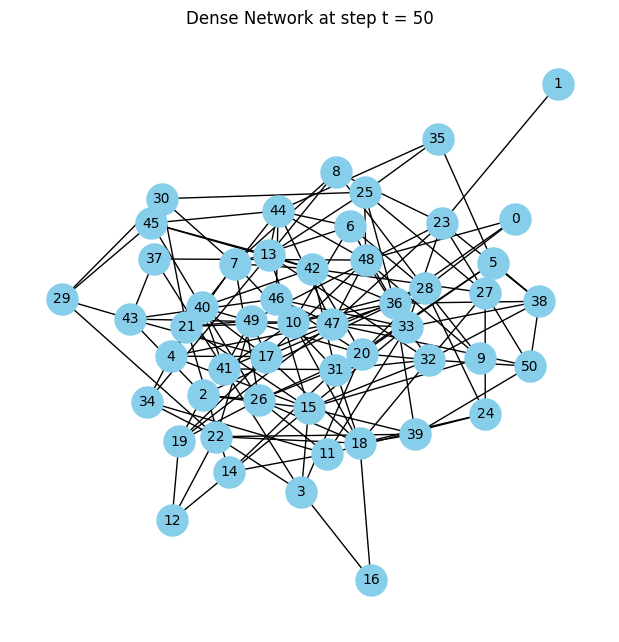

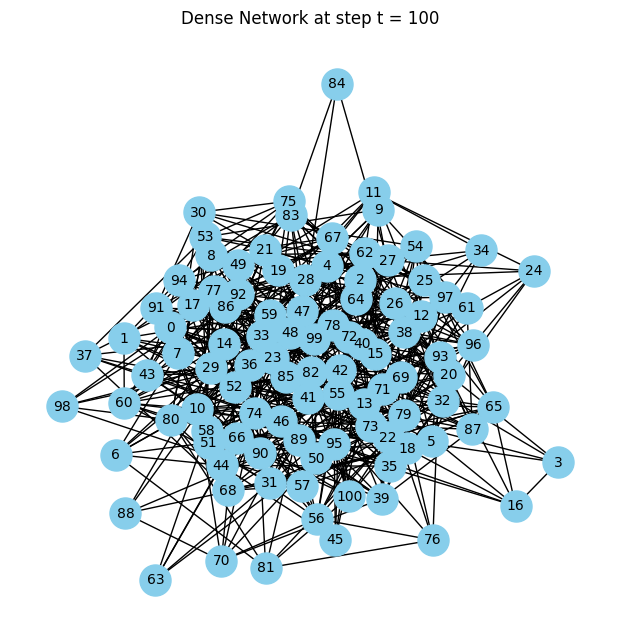

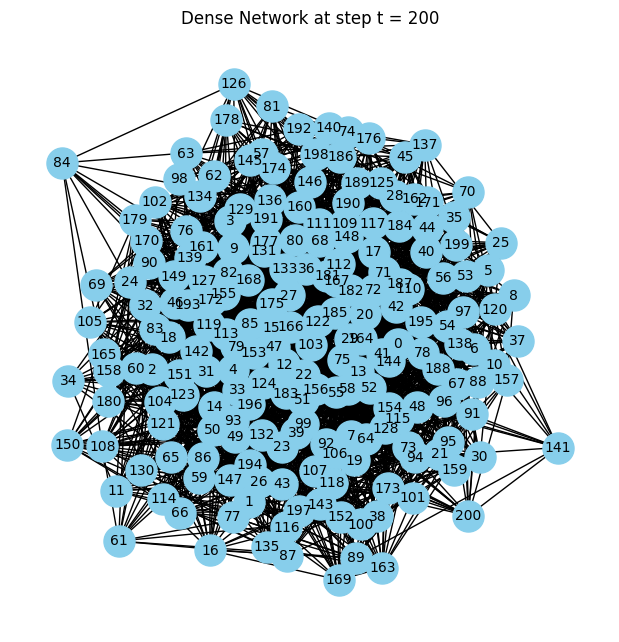

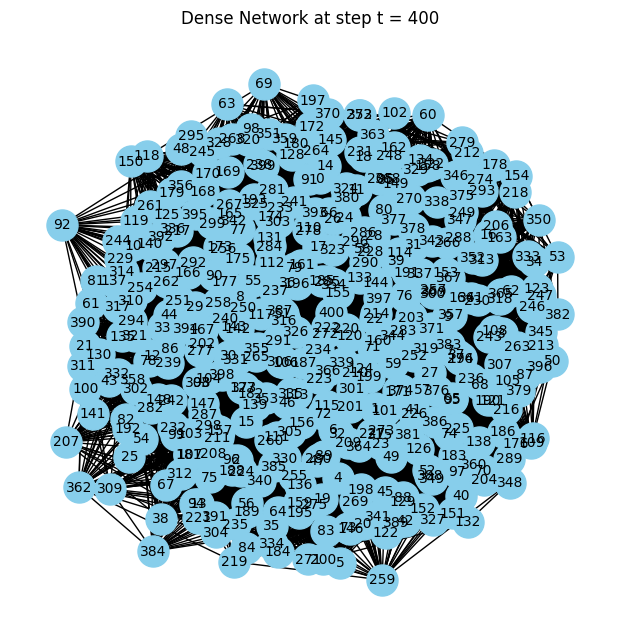

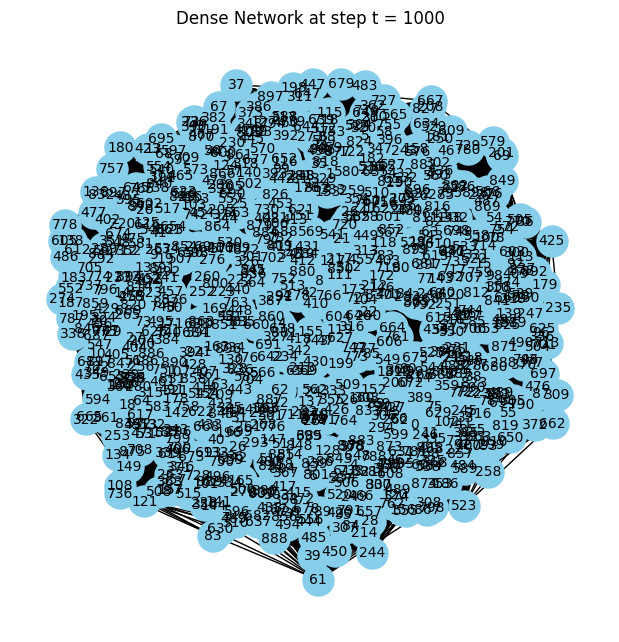

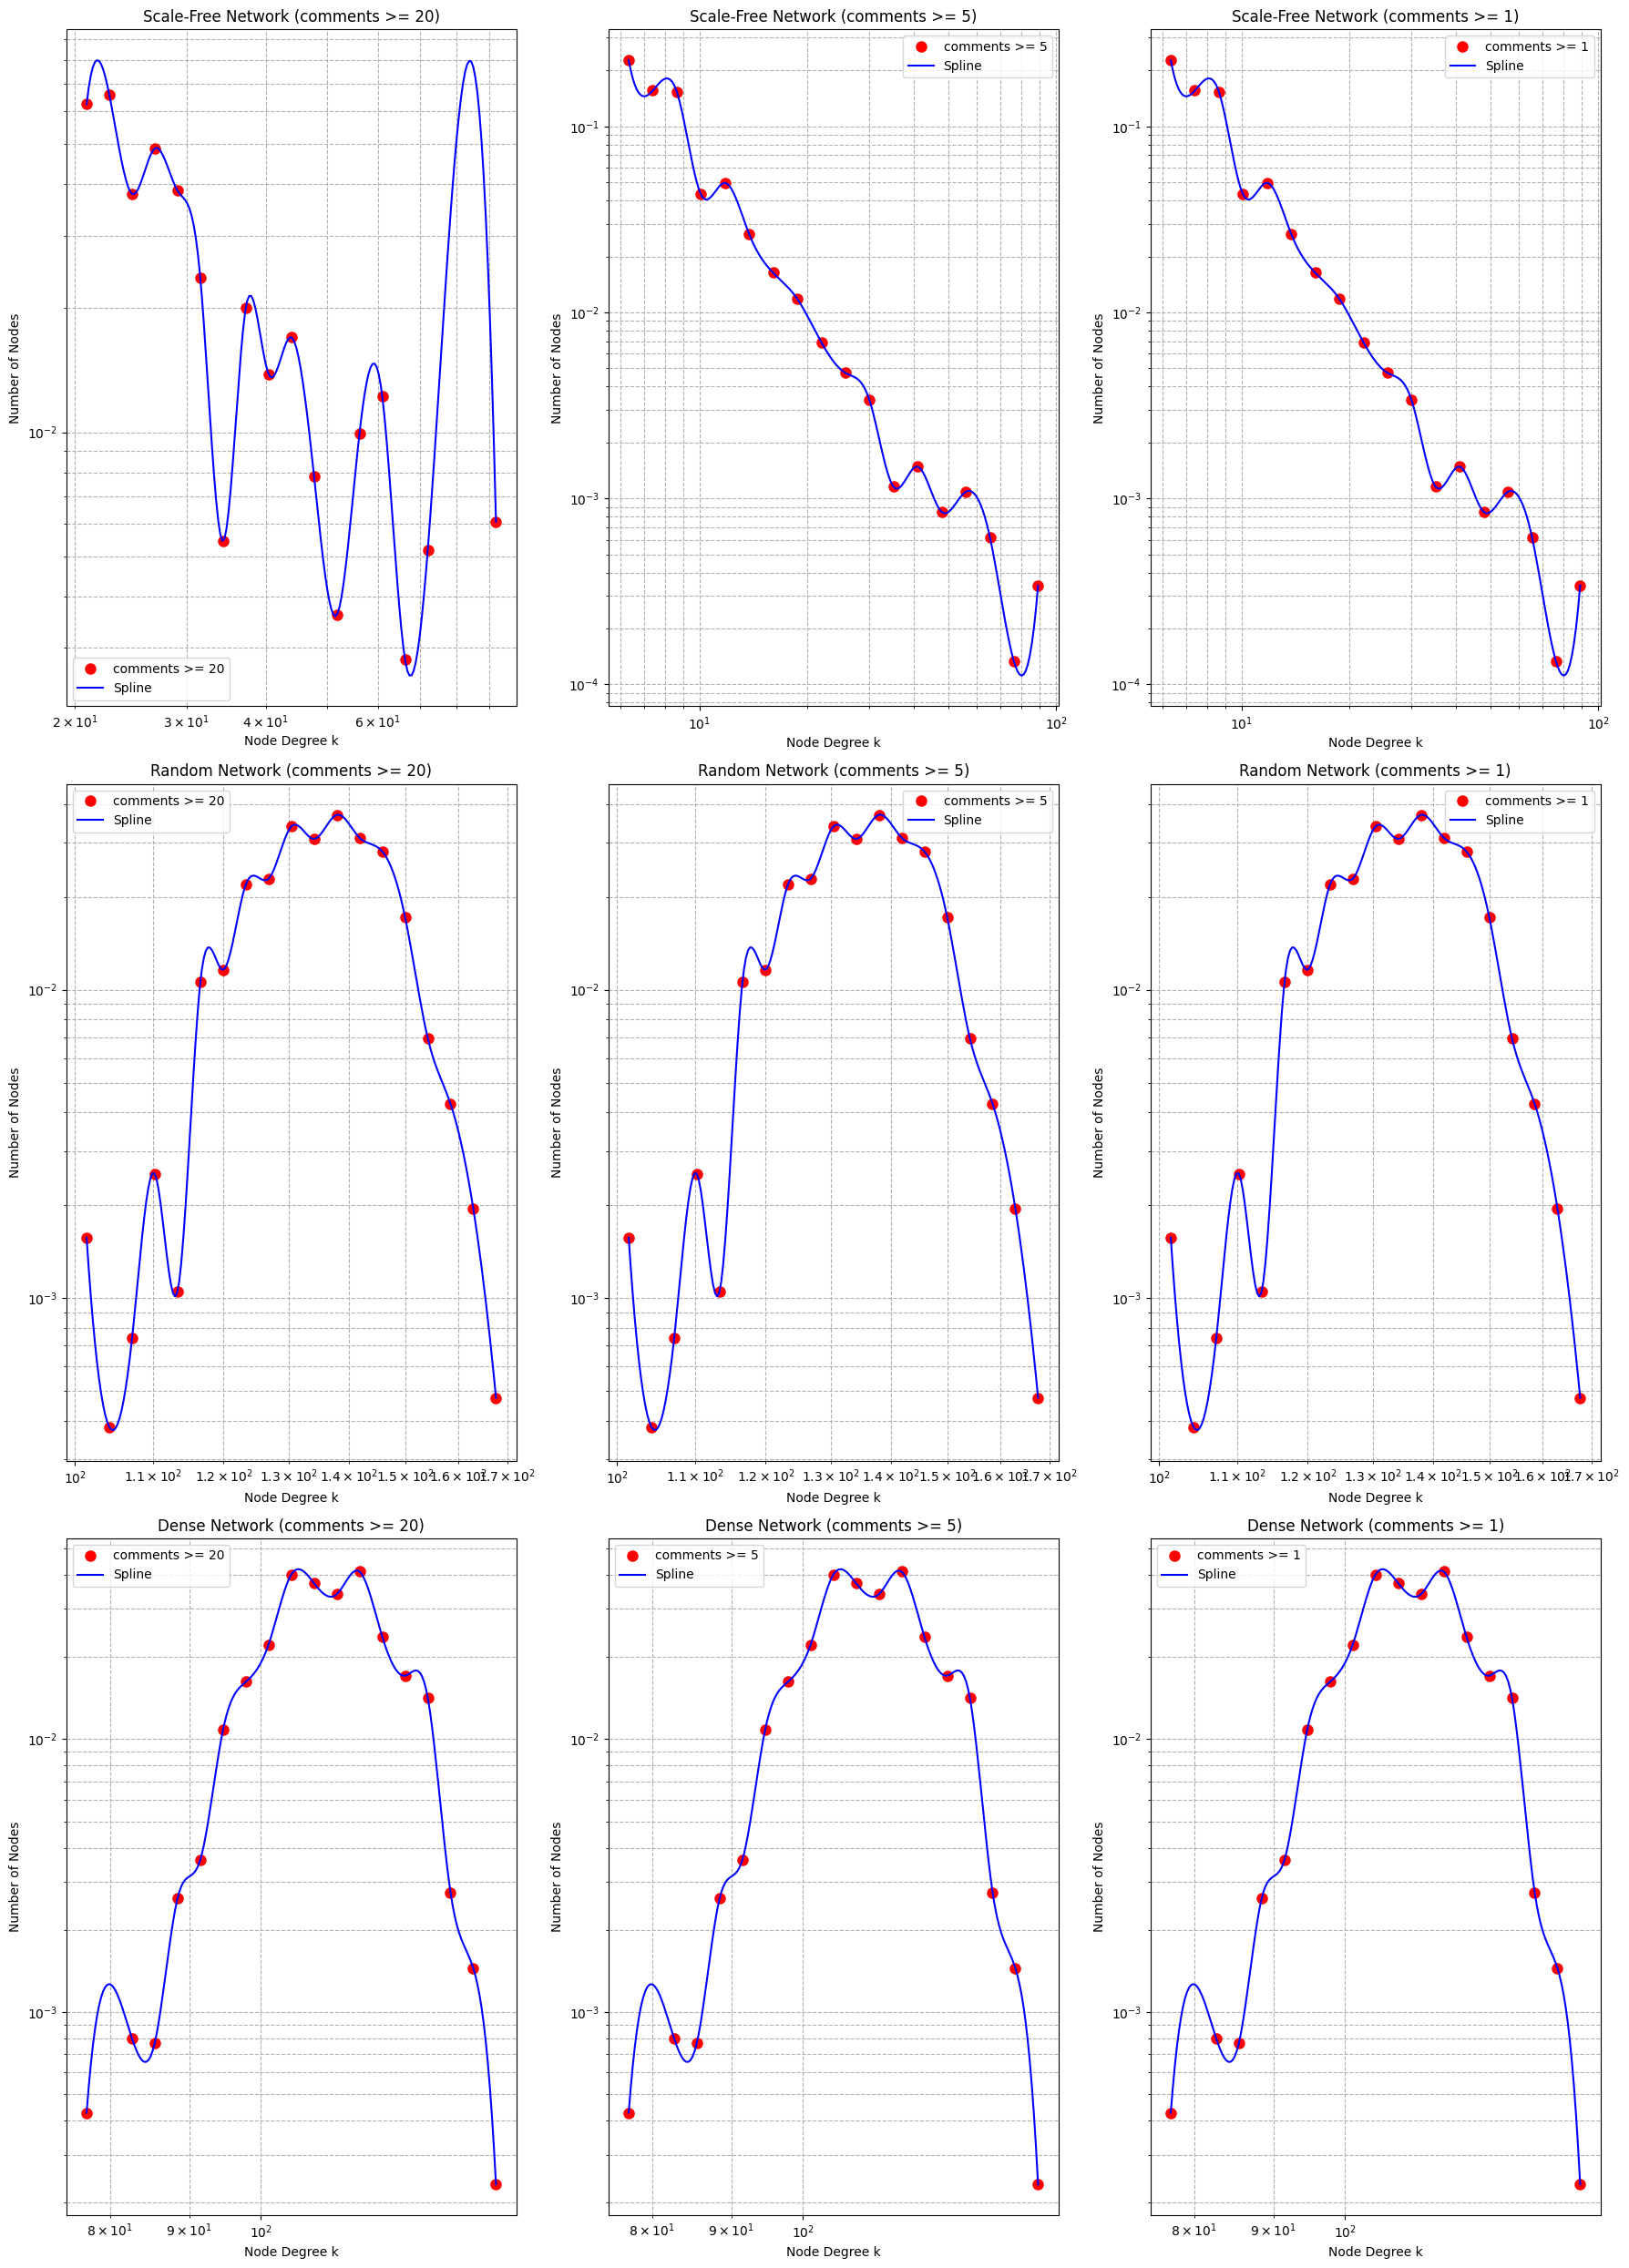

In [3]:
# Initial graph (t=0)
initial_graph = create_initial_graph(node_count=8)
visualize_graph(initial_graph, "Initial Network (t0)")

# Network evolution steps
evolution_steps = [1, 2, 5, 10, 50, 100, 200, 400, 1000]

# Visualize scale-free (Barabasi-Albert) network evolution
visualize_network_evolution('ba', evolution_steps, "Barabasi-Albert Network")

# Visualize random (Erdos-Renyi) network evolution
visualize_network_evolution('random', evolution_steps, "Random Erdos-Renyi Network")

# Visualize dense network evolution
visualize_network_evolution('dense', evolution_steps, "Dense Network")

# Degree distribution analysis
degree_sequence_ba = sorted([d for n, d in generate_scale_free_graph().degree()], reverse=True)
degree_sequence_random = sorted([d for n, d in generate_random_graph().degree()], reverse=True)
degree_sequence_dense = sorted([d for n, d in generate_dense_graph().degree()], reverse=True)

# Create plots for degree distribution analysis
fig, axs = plt.subplots(3, 3, figsize=(18, 25))
axs = axs.flatten()

degree_thresholds = [20, 5, 1]

for i, threshold in enumerate(degree_thresholds):
    plot_log_binned_distribution(degree_sequence_ba, axs[i], f'Scale-Free Network (comments >= {threshold})', min_degree=threshold)
    plot_log_binned_distribution(degree_sequence_random, axs[i + 3], f'Random Network (comments >= {threshold})', min_degree=threshold)
    plot_log_binned_distribution(degree_sequence_dense, axs[i + 6], f'Dense Network (comments >= {threshold})', min_degree=threshold)

plt.tight_layout()
plt.show()

In [4]:
def generate_scale_free_network(num_nodes: int, edges_per_node: int) -> nx.Graph:
    """Generate a scale-free network using the Barabasi-Albert model.

    Args:
        num_nodes (int): Number of nodes in the network.
        edges_per_node (int): Number of edges to attach from a new node to existing nodes.

    Returns:
        nx.Graph: A scale-free network.
    """
    return nx.barabasi_albert_graph(n=num_nodes, m=edges_per_node)

def add_random_weak_links(graph: nx.Graph, probability: float) -> nx.Graph:
    """Add weak links (random edges) to a graph based on a given probability.

    Args:
        graph (nx.Graph): Input graph.
        probability (float): Probability of adding a weak link between any two nodes.

    Returns:
        nx.Graph: A new graph with weak links added.
    """
    modified_graph = graph.copy()
    nodes = list(graph.nodes())
    
    for i, node_a in enumerate(nodes):
        for node_b in nodes[i + 1:]:
            if not modified_graph.has_edge(node_a, node_b) and np.random.rand() < probability:
                modified_graph.add_edge(node_a, node_b)
                
    return modified_graph

def log_binned_degree_distribution(degree_sequence: List[int], min_degree: int) -> tuple:
    """Calculate log-binned degree distribution for a given degree sequence.

    Args:
        degree_sequence (List[int]): List of node degrees.
        min_degree (int): Minimum degree to consider in the distribution.

    Returns:
        tuple: Log-binned histogram values, bin centers, and bins.
    """
    filtered_degrees = [d for d in degree_sequence if d >= min_degree]
    bins = np.logspace(np.log10(min(filtered_degrees)), np.log10(max(filtered_degrees)), num=20)
    hist, bin_edges = np.histogram(filtered_degrees, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    non_zero_mask = hist > 0
    
    return hist[non_zero_mask], bin_centers[non_zero_mask], bins

def plot_degree_distribution(
    ax: plt.Axes, 
    degree_sequence: List[int], 
    title: str, 
    min_degree: int
):
    """Plot the degree distribution with log-log scaling and a spline fit.

    Args:
        ax (plt.Axes): Matplotlib Axes object for the plot.
        degree_sequence (List[int]): List of node degrees.
        title (str): Title for the plot.
        min_degree (int): Minimum degree to include in the distribution.
    """
    hist, bin_centers, _ = log_binned_degree_distribution(degree_sequence, min_degree)

    # Plot the log-binned data
    ax.plot(bin_centers, hist, 'o', markersize=8, color='r', label=f'Degree >= {min_degree}')

    # Fit and plot a spline curve
    x_smooth = np.logspace(np.log10(min(bin_centers)), np.log10(max(bin_centers)), 200)
    spline = make_interp_spline(np.log10(bin_centers), np.log10(hist), k=3)
    y_smooth = spline(np.log10(x_smooth))
    ax.plot(x_smooth, 10**y_smooth, linestyle='-', color='b', label='Spline Fit')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, which="both", ls="--")
    ax.set_xlabel('Node Degree (k)')
    ax.set_ylabel('Probability Density')
    ax.legend()
    ax.set_title(title)

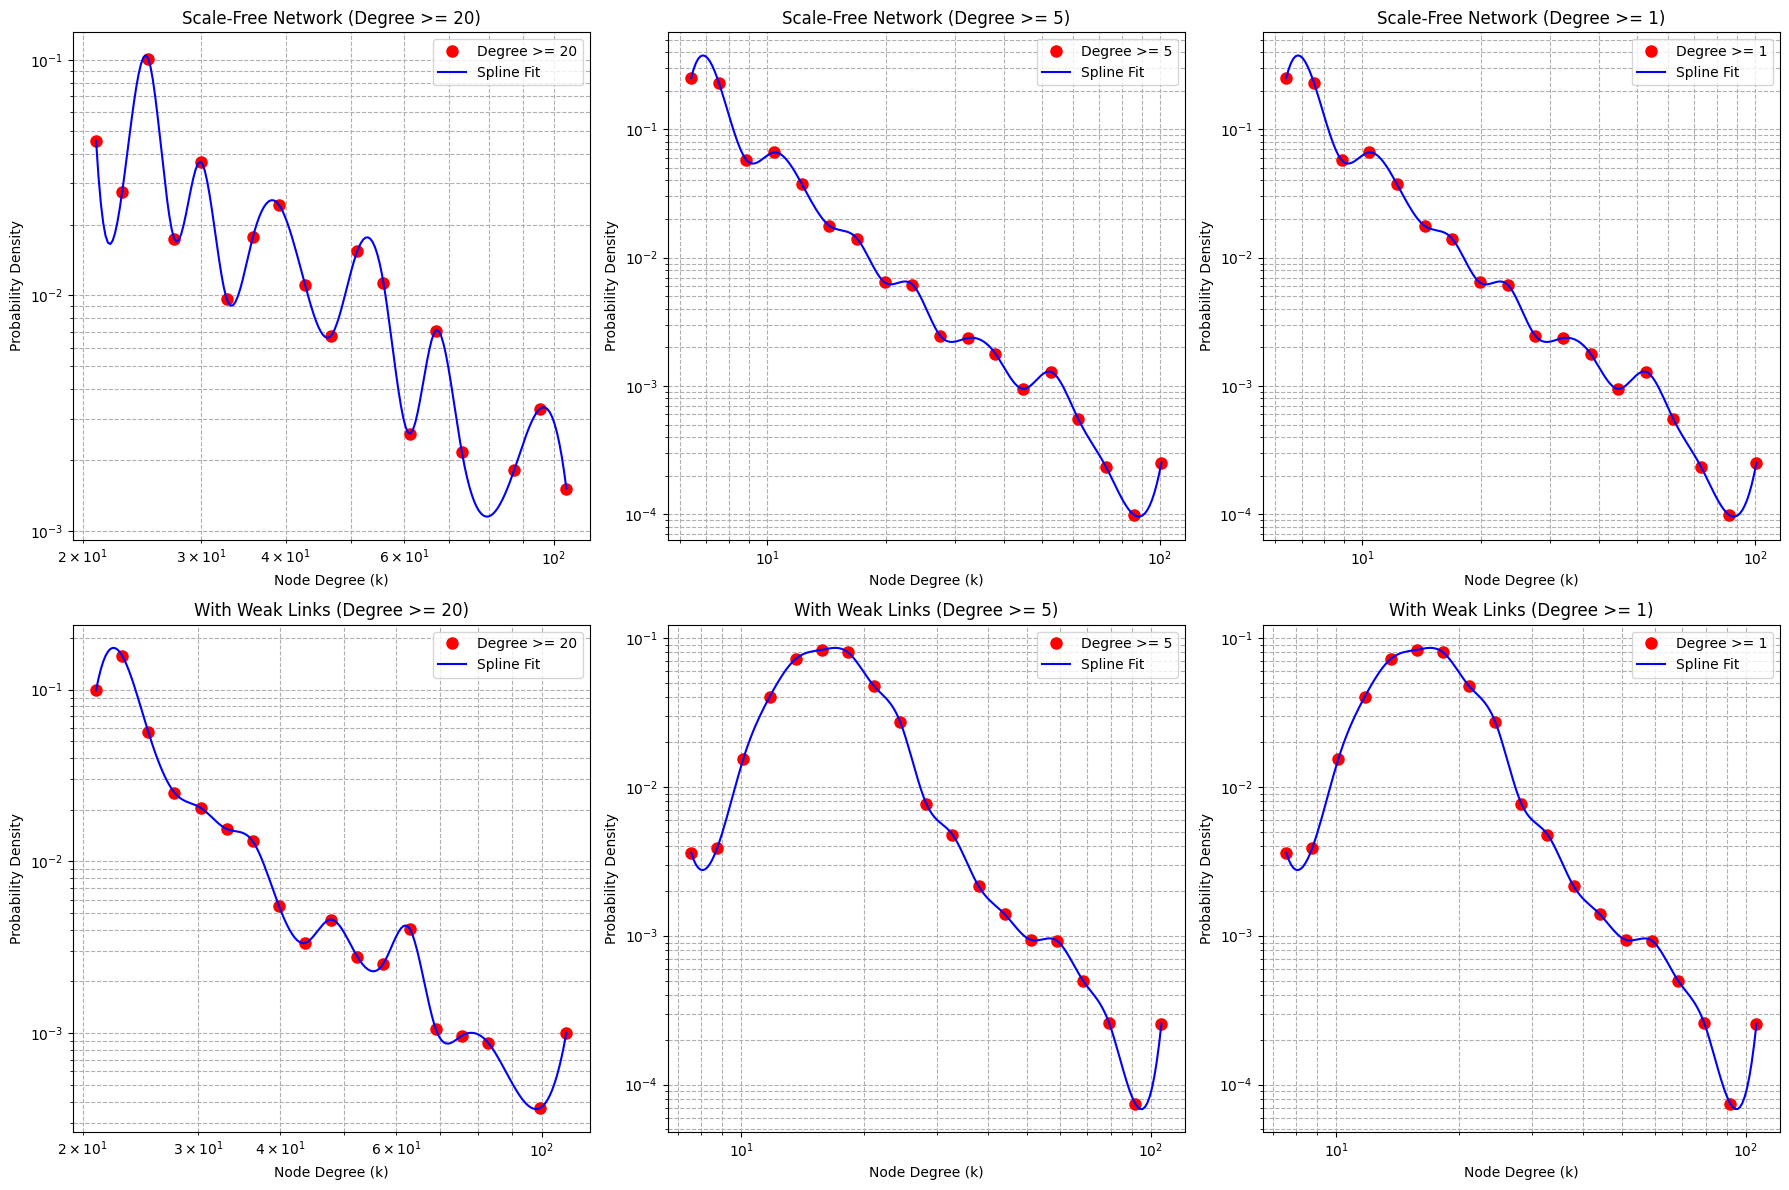

In [5]:
# Parameters for the scale-free network
num_nodes = 1000
edges_per_node = 5

# Generate scale-free network and add weak links
scale_free_graph = generate_scale_free_network(num_nodes, edges_per_node)
weak_links_graph = add_random_weak_links(scale_free_graph, probability=0.01)

# Compute degree sequences
scale_free_degrees = sorted([d for _, d in scale_free_graph.degree()], reverse=True)
weak_links_degrees = sorted([d for _, d in weak_links_graph.degree()], reverse=True)

# Plot settings
thresholds = [20, 5, 1]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, threshold in enumerate(thresholds):
    plot_degree_distribution(axes[i], scale_free_degrees, f'Scale-Free Network (Degree >= {threshold})', threshold)
    plot_degree_distribution(axes[i + 3], weak_links_degrees, f'With Weak Links (Degree >= {threshold})', threshold)

plt.tight_layout()
plt.show()